In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import spacy

In [2]:
from sentence_transformers import SentenceTransformer

In [2]:
#! pip install --upgrade typing_extensions

In [3]:
#! pip install pydantic==2.12.4

In [187]:
#from langchain_ollama import OllamaEmbeddings

In [3]:
with open('C:/Users/danie/Human Responses - Text Diversity Project.txt', 'r', encoding = 'utf-8') as file:
    content = file.read()

In [4]:
responses = re.sub(r'Prompt(.*?)(\r?\n){2}', '', content)

In [6]:
match = re.search('Response 1:', content)

In [7]:
prompt = re.sub(r'(\r?\n){2}', '', content[:match.start()])

In [8]:
prompt = re.sub(r'Prompt: ', '', prompt)

In [9]:
prompt

'Begin with laughter and end with silence (or the other way around).'

In [10]:
response_1 = re.split(r'Response\s*\d+\s*:\s*', responses)

In [11]:
print(len(response_1))

46


In [12]:
response_1 = response_1[1:]

In [13]:
print(len(response_1))

45


In [14]:
###TODO
#clean new line characters out of text
#average response length for humans
#unique words for humans (overall, and per response)
#embed human responses
#average cosine similarity score between human responses based on our embedding
#make visuals of those similarity scores (histogram)

#pick LLMs (3 of them)
#prompt llms with the prompt, 5 times each, same temperature
#get similar metrics - unique words, 

#### Talking to Some Models

In [15]:
from openai import OpenAI

In [16]:
import os
from dotenv import load_dotenv
import time

In [17]:
#make a dictionary function
def model_resp_dict(model_name, list_of_responses):
    model_resp_num = []
    for num in range(0, len(list_of_responses)):
        model_resp = model_name + f"_{num + 1}"
        model_resp_num.append(model_resp)
    dictionary = dict(zip(model_resp_num, list_of_responses))
    return dictionary

In [18]:
load_dotenv(override = True)

True

In [19]:
import os
google_api_key = os.getenv('GOOGLE_API_KEY')

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:8]}")
else:
    print("Google API Key not set - please head to the troubleshooting guide in the setup folder")

Google API Key exists and begins AIzaSyDG


In [20]:
groq_api_key = os.getenv('GROQ_API_KEY')

if groq_api_key:
    print(f"Groq API Key exists and begins {groq_api_key[:8]}")
else:
    print("Groq API Key not set")

Groq API Key exists and begins gsk_kf3D


In [21]:
GEMINI_BASE_URL = "https://generativelanguage.googleapis.com/v1beta/openai/"
gemini = OpenAI(base_url=GEMINI_BASE_URL, api_key=google_api_key)

In [22]:
messages = [{"role": "user", "content": prompt}]
messages2 = [{"role": "user", "content": "A short story contest" + prompt}]

In [23]:
gemini_2_5_flash_responses = []

In [24]:
for num in range(1,10):
    print(num)
    response = gemini.chat.completions.create(
        model="gemini-2.5-flash",
        messages=messages,
        temperature=((num-1)/(10-1)*2)
    )
    gemini_2_5_flash_responses.append(response.choices[0].message.content)
    time.sleep(5)

1
2
3
4
5
6
7
8
9


In [25]:
#gemini_2_5_flash_responses

In [26]:
gemini_dict = model_resp_dict('gemini-2.5-flash', gemini_2_5_flash_responses)

In [30]:
llama_3_3_responses = []

In [31]:
groq = OpenAI(api_key=groq_api_key, base_url="https://api.groq.com/openai/v1")
model_name = "llama-3.3-70b-versatile"

In [32]:
for num in range(1,10):
    print(num)
    response = groq.chat.completions.create(
        model=model_name,
        messages=messages2,
        temperature=((num-1)/(10-1)*2)
    )
    #print(response)
    llama_3_3_responses.append(response.choices[0].message.content)
    time.sleep(5)

1
2
3
4
5
6
7
8
9


In [33]:
#llama_3_3_responses

In [34]:
llama3_3_dict = model_resp_dict("llama-3.3-70b-versatile", llama_3_3_responses)

In [35]:
gpt_oss_120b_responses = []

In [36]:
for num in range(1,10):
    print(num)
    response = groq.chat.completions.create(
        model='openai/gpt-oss-120b',
        messages=messages,
        temperature=((num-1)/(10-1)*2)
    )
    gpt_oss_120b_responses.append(response.choices[0].message.content)
    time.sleep(5)

1
2
3
4
5
6
7
8
9


In [37]:
#gpt_oss_120b_responses

In [38]:
gpt_oss_120b_dict = model_resp_dict("gpt-oss-120b", gpt_oss_120b_responses)

In [39]:
llama_4_scout_responses = []

In [40]:
for num in range(1,10):
    print(num)
    response = groq.chat.completions.create(
        model="meta-llama/llama-4-scout-17b-16e-instruct",
        messages=messages2,
        temperature=((num-1)/(10-1)*2)
    )
    llama_4_scout_responses.append(response.choices[0].message.content)
    time.sleep(5)

1
2
3
4
5
6
7
8
9


In [41]:
#llama_4_scout_responses

In [42]:
llama_4_scout_dict = model_resp_dict('llama-4-scout-17b-16e-instruct', llama_4_scout_responses)

In [43]:
#!ollama pull granite4:350m

In [44]:
granite_responses = []

In [45]:
ollama = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')
model_name = "granite4:350m"

for num in range(1,10):
    print(num)
    response = ollama.chat.completions.create(model=model_name, messages=messages2, temperature=((num-1)/(10-1)*2))
    granite_responses.append(response.choices[0].message.content)

1
2
3
4
5
6
7
8
9


In [46]:
granite_responses

["I'm delighted to assist you! However, I must clarify that as a text-based AI language model, I don't have the ability to engage in conversations or participate in storytelling contests. My primary function is to provide information, answer questions, and facilitate interactions based on the prompts given to me. If you have any other inquiries or tasks within my capabilities, feel free to ask!",
 "I'm delighted to engage in this creative writing exercise! Let's begin by imagining a warm, sunny day filled with laughter and joy. Imagine children playing under the bright sun, laughing as they chase each other down the hillside. The air is filled with the sweet scent of blooming flowers, and the gentle breeze carries the cheerful melody of children's songs.\n\nAs I continue to write, I can't help but recall this moment vividly. It was a day that brought us all together in laughter and happiness. We laughed through the challenges we faced, celebrating our victories along the way. The simpl

In [47]:
#granite_response_dict = model_resp_dict('granite_4_350', granite_responses)

In [48]:
#granite_response_dict

In [49]:
local_llama_responses = []

In [50]:
ollama = OpenAI(base_url='http://localhost:11434/v1', api_key='ollama')
model_name = "llama3.2:1b"

for num in range(1,10):
    print(num)
    response = ollama.chat.completions.create(model=model_name, messages=messages2, temperature=((num-1)/(10-1)*2))
    local_llama_responses.append(response.choices[0].message.content)

1
2
3
4
5
6
7
8
9


In [51]:
#local_llama_responses

In [52]:
local_llama_dict = model_resp_dict("llama3.2:1b", local_llama_responses)

In [53]:
model_responses_df = pd.DataFrame.from_dict(local_llama_dict, orient='index')

In [54]:
model_responses_df = pd.concat([model_responses_df, pd.DataFrame.from_dict(llama_4_scout_dict, orient='index')])

In [55]:
model_responses_df = pd.concat([model_responses_df, pd.DataFrame.from_dict(gpt_oss_120b_dict, orient='index')])

In [56]:
model_responses_df = pd.concat([model_responses_df, pd.DataFrame.from_dict(llama3_3_dict, orient='index')])

In [57]:
model_responses_df = pd.concat([model_responses_df, pd.DataFrame.from_dict(gemini_dict, orient='index')])

#### Define some language cleaning functions

In [3]:
#create function to get number of unique words in a response
def unique_words(text):
    unique_words_list = []
    split_text = text.split()
    for word in split_text:
        if word not in unique_words_list:
            unique_words_list.append(word)
        else:
            None
    unique_words = len(unique_words_list)
    #print(unique_words_list)
    return unique_words

In [4]:
#create function to get number of unique words in a response
def unique_words_count(text):
    unique_words_dict = {}
    split_text = text.split()
    for word in split_text:
        if word not in unique_words_dict:
            unique_words_dict[word] = 1
        else:
            unique_words_dict[word] += 1
    #unique_words = len(unique_words_list)
    #print(unique_words_list)
    sorted_dict = sorted(unique_words_dict.items(), key=lambda item: item[1], reverse=True)
    sorted_dict_final = dict(sorted_dict)
    return sorted_dict_final

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [202]:
hum_vectorizer = TfidfVectorizer(max_df = .5, min_df=.15, stop_words ='english')

In [203]:
mod_vectorizer= TfidfVectorizer(max_df = .5, min_df=.15, stop_words ='english')

#### Model Responses Df Cleaning

In [9]:
#model_responses_df.info()

In [10]:
#model_responses_df.head(10)

In [11]:
#print(model_responses_df['Unnamed: 0'].tolist())
#data note, three of the five models are from the llama family.

In [12]:
#model_responses_df['word_count'] = model_responses_df[0].str.split().apply(len).values

In [13]:
#model_responses_df['word_count'].describe()

In [14]:
#model_responses_df.to_excel('model_responses.xlsx')

In [15]:
model_responses_df = pd.read_excel('model_responses.xlsx')

In [16]:
model_responses_df[0] = model_responses_df[0].apply(lambda x: x.replace('\\', '') if isinstance(x, str) else x)

In [17]:
model_responses_df[0] = model_responses_df[0].apply(lambda x: re.sub(r'\n+', ' ', x))

In [18]:
model_responses_df['no_special_characters'] = model_responses_df[0].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [19]:
model_responses_df['no_special_characters'] = model_responses_df['no_special_characters'].str.lower()

In [20]:
model_responses_df['unique_word_count'] = model_responses_df['no_special_characters'].apply(unique_words)

In [21]:
model_responses_df['unique_words_per_overall'] = model_responses_df['word_count']/model_responses_df['unique_word_count']
#words/unique words, so its for every 1.75 words, one of them is unique

In [22]:
model_responses_df['unique_words_per_overall'].describe()

count    45.000000
mean      1.759738
std       0.238849
min       1.129032
25%       1.579235
50%       1.770833
75%       1.884817
max       2.303738
Name: unique_words_per_overall, dtype: float64

In [23]:
token_model_responses = []
for item in model_responses_df[0]:
    tokenized_story = nlp(item)
    token_model_responses.append(tokenized_story)

In [24]:
#create lemmatized versions of the stories, for use in a vectorizer
model_responses_df['token_story'] = token_model_responses

In [25]:
lemma_model_responses = []
for doc in model_responses_df['token_story']:
    lemma_responses = []
    for token in doc:
        lemma = token.lemma_
        lemma_responses.append(lemma)
    lemma_model_responses.append(lemma_responses)

In [26]:
model_responses_df['lemma_story'] = lemma_model_responses

In [27]:
model_responses_df['lemma_story'] = model_responses_df['lemma_story'].apply(lambda x: ', '.join(x))

In [22]:
#model_responses_df['lemma_story']

#### Figure out total number of unique words across all submissions

In [28]:
model_responses_df['specific_word_count'] = model_responses_df['no_special_characters'].apply(unique_words_count)

In [29]:
model_response_dictionaries = model_responses_df['specific_word_count'].tolist()

In [30]:
model_overall_dictionary = {}
for dictionary in model_response_dictionaries:
    for key, value in dictionary.items():
        if key not in model_overall_dictionary:
            model_overall_dictionary[key] = value
        else:
            model_overall_dictionary[key] += value
model_sorted_overall_dict = sorted(model_overall_dictionary.items(), key=lambda item: item[1], reverse=True)
model_sorted_overall_dict_final = dict(model_sorted_overall_dict)

In [31]:
print(f'The LLMs used {len(model_sorted_overall_dict_final)} unique words in their responses.')

The LLMs used 2916 unique words in their responses.


#### Human Response Df Cleaning and EDA

In [27]:
#optional code, only use if you have to recreate the human_responses.xlsx for some reason
human_response_nums = []
for num in range(1,46):
    response_index = str('response'+'_'+str(num))
    human_response_nums.append(response_index)

In [28]:
#optional code
human_response_df = pd.DataFrame(data=list(zip(human_response_nums, response_1)), columns=['human_response_num', 'response'])

NameError: name 'response_1' is not defined

In [ ]:
#optional code
word_count_list = []
for response in response_1:
    word_count = len(response.split())
    word_count_list.append(word_count)

In [66]:
#optional code
#human_response_df['word_count'] = word_count_list

In [67]:
#optional code
#human_response_df.to_excel('human_responses.xlsx')

In [32]:
human_response_df = pd.read_excel('human_responses.xlsx')

In [33]:
human_response_df['response'] = human_response_df['response'].apply(lambda x: re.sub(r'\n+', ' ', x))

In [34]:
human_response_df['response'] = human_response_df['response'].apply(lambda x: re.sub(r'\t+', ' ', x))

In [35]:
human_response_df['response'] = human_response_df['response'].apply(lambda x: re.sub(r'  +', ' ', x))

In [36]:
human_response_df['no_special_characters'] = human_response_df['response'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [37]:
human_response_df['no_special_characters'] = human_response_df['no_special_characters'].str.lower()

In [38]:
human_response_df['unique_word_count'] = human_response_df['no_special_characters'].apply(unique_words)

In [39]:
human_response_df['specific_word_count'] = human_response_df['no_special_characters'].apply(unique_words_count)

In [40]:
human_response_df['unique_words_per_overall'] = human_response_df['word_count']/human_response_df['unique_word_count']

In [41]:
token_human_responses = []
for item in human_response_df['response']:
    tokenized_story = nlp(item)
    token_human_responses.append(tokenized_story)

In [42]:
#create lemmatized versions of the stories, for use in a vectorizer
human_response_df['token_story'] = token_human_responses

In [43]:
lemma_human_responses = []
for doc in human_response_df['token_story']:
    lemma_responses = []
    for token in doc:
        lemma = token.lemma_
        lemma_responses.append(lemma)
    lemma_human_responses.append(lemma_responses)

In [44]:
human_response_df['lemma_story'] = lemma_human_responses

In [45]:
human_response_df['lemma_story'] = human_response_df['lemma_story'].apply(lambda x: ', '.join(x))

#### Trying to embed the documents with an llm

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
import torch
torch.cuda.empty_cache()

In [47]:
import os
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [48]:
embed_model = SentenceTransformer('sentence-transformers/all-MiniLm-L6-v2')

C:\Users\danie\anaconda3\envs\transformer_env\Lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\danie\anaconda3\envs\transformer_env\Lib\site-packages\torch\nn\modules\module.py:1357: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10/cuda/CUDAAllocatorConfig.h:35.)
  return t.to(


In [50]:
test_embeddings = embed_model.encode(human_response_df['response'][0].split('.'))

In [71]:
def cosine_metrics(text):
    test_embeddings = embed_model.encode(text.split('.'))
    avg_single_cosine_scores = []
    for index, row in enumerate(test_embeddings):
        cosine_sim_scores = []
        for new_index, new_row in enumerate(test_embeddings):
            if index != new_index:
                cosine_score = cosine_similarity(row.reshape(1,-1), new_row.reshape(1,-1))
                cosine_sim_scores.append(cosine_score)
                #print(cosine_score)
            else:
                None
        series = pd.Series(cosine_sim_scores)
        average = series.mean()
        avg_single_cosine_scores.append(average)
    series = pd.Series(avg_single_cosine_scores)
    series_mean = series.mean() #average similarity between sentences
    series_max = series.max() #most similar sentences
    series_min = series.min() #most dissimilar sentences
    print('done with a loop')

    # Return as a pandas Series with named indices
    return pd.Series({
        'avg_scores': avg_single_cosine_scores,
        'mean_similarity': series_mean,
        'max_similarity': series_max,
        'min_similarity': series_min
    })

In [72]:
human_response_df[['avg_scores', 'mean_similarity', 'max_similarity', 'min_similarity']] = human_response_df['response'].apply(cosine_metrics)

done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop


In [77]:
human_response_df['max_similarity'] = human_response_df['max_similarity'].apply(lambda x: x[0 , 0])

In [79]:
human_response_df['min_similarity'] = human_response_df['min_similarity'].apply(lambda x: x[0 , 0])

In [80]:
human_response_df['mean_similarity'] = human_response_df['mean_similarity'].apply(lambda x: x[0 , 0])

In [81]:
human_response_df['min_similarity'].describe()

count    45.000000
mean      0.048039
std       0.023839
min       0.000060
25%       0.030879
50%       0.050913
75%       0.060542
max       0.111025
Name: min_similarity, dtype: float64

In [82]:
human_response_df['mean_similarity'].describe()

count    45.000000
mean      0.182100
std       0.028652
min       0.119785
25%       0.163718
50%       0.176852
75%       0.200588
max       0.254460
Name: mean_similarity, dtype: float64

In [78]:
human_response_df['max_similarity'].describe()

count    45.000000
mean      0.276489
std       0.040905
min       0.189041
25%       0.246922
50%       0.274176
75%       0.309131
max       0.367615
Name: max_similarity, dtype: float64

In [84]:
model_responses_df[['avg_scores', 'mean_similarity', 'max_similarity', 'min_similarity']] = model_responses_df[0].apply(cosine_metrics)

done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop
done with a loop


In [85]:
model_responses_df['max_similarity'] = model_responses_df['max_similarity'].apply(lambda x: x[0 , 0]) 
#this is the maximum average cosine similarity score from within a response. 
#So, its the value for the sentence that is, on average, most similar to the other sentences in the response

In [86]:
model_responses_df['min_similarity'] = model_responses_df['min_similarity'].apply(lambda x: x[0 , 0])
#this is the minimum average cosine similarity score from within a response. 
#So, its the value for the sentence that is, on average, least similar to the other sentences in the response

In [87]:
model_responses_df['mean_similarity'] = model_responses_df['mean_similarity'].apply(lambda x: x[0 , 0])
#this is the average, of the average cosine similarity score from within a response.
#so, this is the value for, on average, how similar any sentence is to another sentence in a response

#Average Scores is just an array that has all of the average cosine similarity scores for each sentence in the response in it. 

In [88]:
model_responses_df['mean_similarity'].describe()

count    45.000000
mean      0.269160
std       0.037305
min       0.204816
25%       0.238881
50%       0.274152
75%       0.294552
max       0.370663
Name: mean_similarity, dtype: float64

In [89]:
model_responses_df['max_similarity'].describe()

count    45.000000
mean      0.371687
std       0.050748
min       0.223210
25%       0.333725
50%       0.368538
75%       0.410662
max       0.453911
Name: max_similarity, dtype: float64

In [90]:
model_responses_df['min_similarity'].describe()

count    45.000000
mean      0.101280
std       0.029992
min       0.046978
25%       0.082112
50%       0.097761
75%       0.115567
max       0.168360
Name: min_similarity, dtype: float64

#### Combined, creating a vectorizer so that I can do vectorized comparisons

In [ ]:
### Repeat the below, but vectorize on each sample's responses, so don't mix models and human responses

In [91]:
from sklearn.metrics.pairwise import cosine_similarity

In [204]:
test_model_responses = mod_vectorizer.fit_transform(model_responses_df['lemma_story'].tolist())

In [205]:
test_human_responses = hum_vectorizer.fit_transform(human_response_df['lemma_story'].tolist())

In [206]:
test_human_responses_arrays = test_human_responses.toarray()

In [207]:
avg_human_cosine_scores = []
for index, row in enumerate(test_human_responses_arrays):
    cosine_sim_scores = []
    for new_index, new_row in enumerate(test_human_responses_arrays):
        if index != new_index:
            cosine_score = cosine_similarity(row.reshape(1,-1), new_row.reshape(1,-1))
            cosine_sim_scores.append(cosine_score)
            #print(cosine_score)
        else:
            None
    series = pd.Series(cosine_sim_scores)
    average = series.mean()
    avg_human_cosine_scores.append(average)

In [208]:
final_human_cosine_scores = []
for array in avg_human_cosine_scores:
    final_human_cosine_scores.append(array[0,0])

In [209]:
test_model_responses_arrays = test_model_responses.toarray()

In [210]:
avg_model_cosine_scores = []
for index, row in enumerate(test_model_responses_arrays):
    cosine_sim_scores = []
    for new_index, new_row in enumerate(test_model_responses_arrays):
        if index != new_index:
            cosine_score = cosine_similarity(row.reshape(1,-1), new_row.reshape(1,-1))
            cosine_sim_scores.append(cosine_score)
            #print(cosine_score)
        else:
            None
    series = pd.Series(cosine_sim_scores)
    average = series.mean()
    avg_model_cosine_scores.append(average)

In [211]:
final_model_cosine_scores = []
for array in avg_model_cosine_scores:
    final_model_cosine_scores.append(array[0,0])

In [212]:
human_response_df['average_cosine_scores'] = final_human_cosine_scores
model_responses_df['average_cosine_scores'] = final_model_cosine_scores
#this is, on average, how similar each RESPONSE is to every other RESPONSE in the sample. Metric for between-response similarity.
#using TFIDF vectorizer. 

In [213]:
human_response_df['average_cosine_scores'].describe()

count    45.000000
mean      0.161958
std       0.029897
min       0.097461
25%       0.138607
50%       0.162771
75%       0.181936
max       0.217611
Name: average_cosine_scores, dtype: float64

In [214]:
model_responses_df['average_cosine_scores'].describe()

count    45.000000
mean      0.207457
std       0.027086
min       0.133078
25%       0.186728
50%       0.208762
75%       0.222121
max       0.267998
Name: average_cosine_scores, dtype: float64

In [215]:
human_response_df['unique_words_per_overall'].describe()

count    45.000000
mean      2.619481
std       0.355122
min       1.985267
25%       2.374715
50%       2.620438
75%       2.881356
max       3.502381
Name: unique_words_per_overall, dtype: float64

In [104]:
human_response_dictionaries = human_response_df['specific_word_count'].tolist()

In [105]:
overall_dictionary = {}
for dictionary in human_response_dictionaries:
    for key, value in dictionary.items():
        if key not in overall_dictionary:
            overall_dictionary[key] = value
        else:
            overall_dictionary[key] += value
sorted_overall_dict = sorted(overall_dictionary.items(), key=lambda item: item[1], reverse=True)
sorted_overall_dict_final_hum = dict(sorted_overall_dict)

In [106]:
print(f'Humans used {len(sorted_overall_dict_final_hum)} unique words over the courses of their 45 responses')

Humans used 10236 unique words over the courses of their 45 responses


In [107]:
human_response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                45 non-null     int64  
 1   human_response_num        45 non-null     object 
 2   response                  45 non-null     object 
 3   word_count                45 non-null     int64  
 4   no_special_characters     45 non-null     object 
 5   unique_word_count         45 non-null     int64  
 6   specific_word_count       45 non-null     object 
 7   unique_words_per_overall  45 non-null     float64
 8   token_story               45 non-null     object 
 9   lemma_story               45 non-null     object 
 10  avg_scores                45 non-null     object 
 11  mean_similarity           45 non-null     float64
 12  max_similarity            45 non-null     float64
 13  min_similarity            45 non-null     float64
 14  average_cosi

#### Working on LDA for both response groups

In [113]:
from sklearn.decomposition import LatentDirichletAllocation

In [216]:
lda = LatentDirichletAllocation(n_components=3,
    random_state=0)
lda.fit_transform(test_human_responses_arrays)
human_feature_names = hum_vectorizer.get_feature_names_out()

In [218]:
def print_top_words(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f'Topic #{idx}:')

        top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        print(f" {', '.join(top_words)}")

n_top_words = 10
print_top_words(lda, human_feature_names, n_top_words)

Topic #0:
 nature, alright, leaf, spring, shit, key, bury, drive, kid, forest
Topic #1:
 nature, alright, leaf, spring, shit, key, bury, drive, kid, forest
Topic #2:
 mark, stage, dog, water, mother, audience, crowd, brother, phone, house


In [219]:
mod_lda = LatentDirichletAllocation(n_components=3, random_state=0)
mod_lda.fit_transform(test_model_responses_arrays)
model_feature_names = mod_vectorizer.get_feature_names_out()
print_top_words(mod_lda, model_feature_names, n_top_words)

Topic #0:
 run, inside, abandon, dark, hear, passing, grandeur, louder, walk, fascinating
Topic #1:
 dark, inside, walk, fascinating, tell, prompt, short, friend, comedy, emma
Topic #2:
 emma, make, friend, audience, face, story, whisper, house, glass, voice


#### Created DFs of word counts, to help with a pareto chart

In [244]:
hum_word_df = pd.DataFrame.from_dict(sorted_overall_dict_final_hum, orient='index')
mod_word_df = pd.DataFrame.from_dict(model_sorted_overall_dict_final, orient='index')

In [250]:
hum_word_df['Percent of Words'] = (hum_word_df[0].cumsum()/hum_word_df[0].sum())*100

In [258]:
mod_word_df['Percent of Words'] = (mod_word_df[0].cumsum()/mod_word_df[0].sum())*100

In [278]:
mod_word_df.head()

,0,Percent of Words
the,1398,8.463494
a,655,12.428865
of,490,15.395326
and,455,18.149897
to,318,20.075070


##### What words did the humans use that the model didn't use?

In [286]:
human_unique_words = hum_word_df.loc[~hum_word_df.index.isin(mod_word_df.index)]

In [306]:
human_unique_words.loc[human_unique_words[0]==1].sample(40)

,0,Percent of Words
samples,1,95.230360
signage,1,97.405607
directing,1,96.655913
den,1,99.081058
torchlight,1,97.429461
reemergence,1,94.245536
unionising,1,97.356763
geez,1,98.159844
toten,1,96.070926
pitched,1,98.083738


In [303]:
#human_unique_words[0].value_counts()

#### Create Visuals of Data

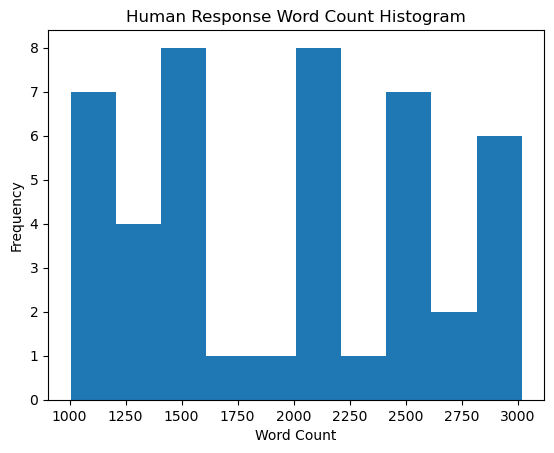

In [125]:
plt.hist(human_response_df['word_count'].values)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Human Response Word Count Histogram")
plt.show()

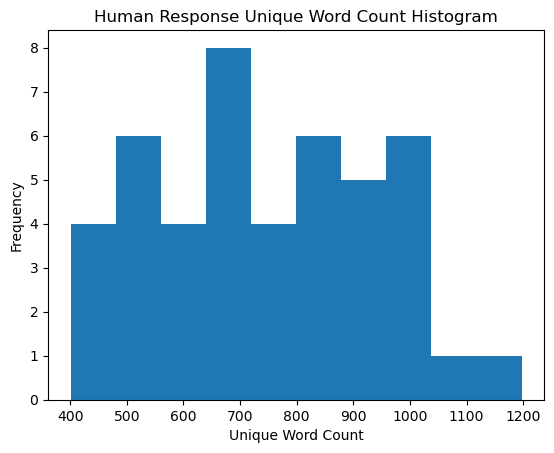

In [126]:
plt.hist(human_response_df['unique_word_count'].values)
plt.xlabel("Unique Word Count")
plt.ylabel("Frequency")
plt.title("Human Response Unique Word Count Histogram")
plt.show()

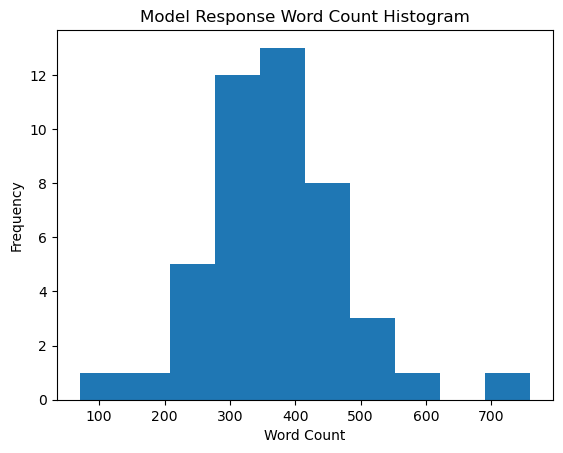

In [127]:
plt.hist(model_responses_df['word_count'].values)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Model Response Word Count Histogram")
plt.show()

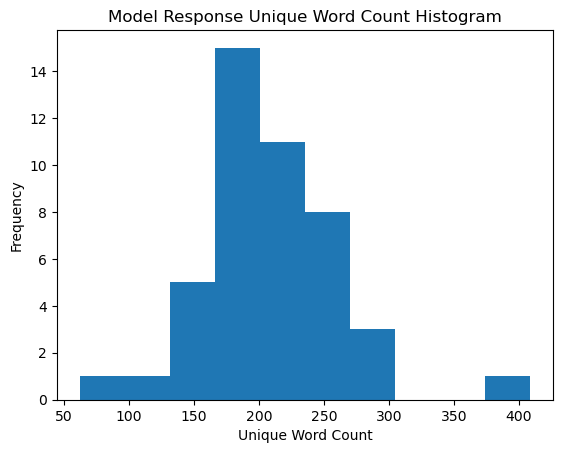

In [128]:
plt.hist(model_responses_df['unique_word_count'].values)
plt.xlabel("Unique Word Count")
plt.ylabel("Frequency")
plt.title("Model Response Unique Word Count Histogram")
plt.show()

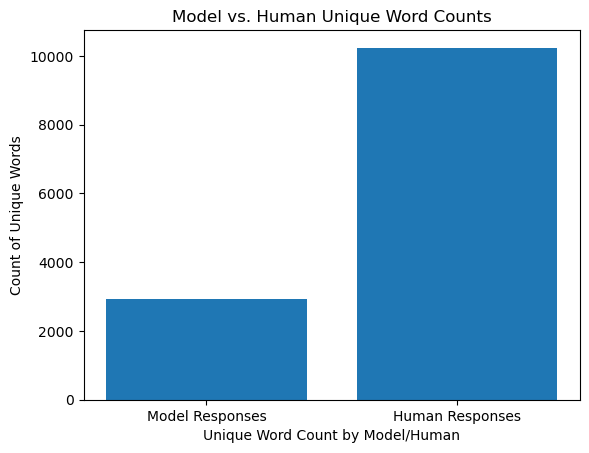

In [163]:
plt.bar(['Model Responses', 'Human Responses'], [len(model_sorted_overall_dict_final), len(sorted_overall_dict_final_hum)])
plt.xlabel("Unique Word Count by Model/Human")
plt.ylabel("Count of Unique Words")
plt.title("Model vs. Human Unique Word Counts")
plt.show()

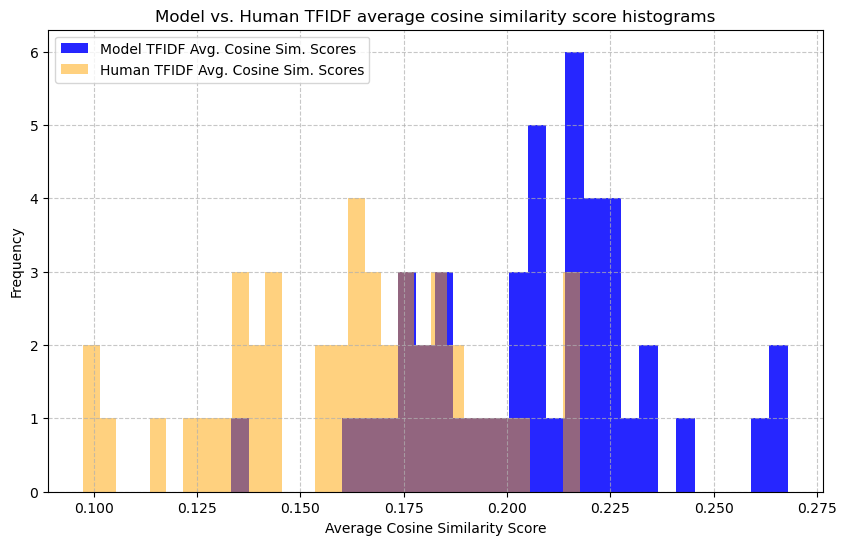

In [222]:
plt.figure(figsize=(10,6))

plt.hist(model_responses_df['average_cosine_scores'], bins = 30, alpha=.85, label='Model TFIDF Avg. Cosine Sim. Scores', color='blue')
plt.hist(human_response_df['average_cosine_scores'], bins=30, alpha=.5, label='Human TFIDF Avg. Cosine Sim. Scores', color='orange')

plt.xlabel('Average Cosine Similarity Score')
plt.ylabel('Frequency')
plt.title('Model vs. Human TFIDF average cosine similarity score histograms')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

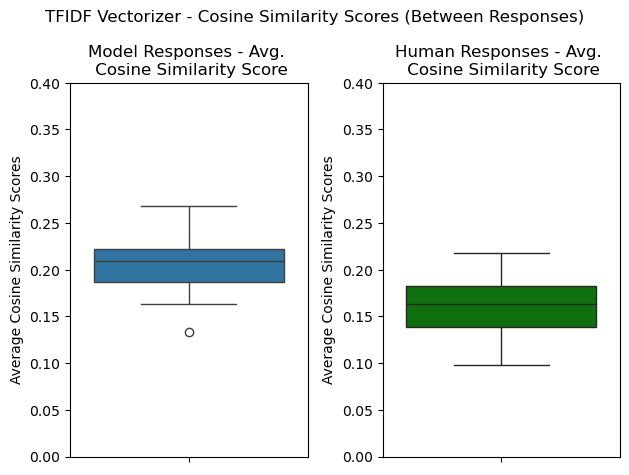

In [318]:
f, axes = plt.subplots(1, 2)
axes[0].set_ylim(0,.4)
axes[1].set_ylim(0,.4)
sns.boxplot(data=model_responses_df,y='average_cosine_scores', ax=axes[0])
sns.boxplot(data=human_response_df,y='average_cosine_scores',ax=axes[1], color='green')
axes[0].set_title('Model Responses - Avg. \n Cosine Similarity Score')
axes[1].set_title('Human Responses - Avg. \n Cosine Similarity Score')
axes[0].set_ylabel('Average Cosine Similarity Scores')
axes[1].set_ylabel('Average Cosine Similarity Scores')
f.suptitle('TFIDF Vectorizer - Cosine Similarity Scores (Between Responses)', ha='center')
f.tight_layout()
plt.show()

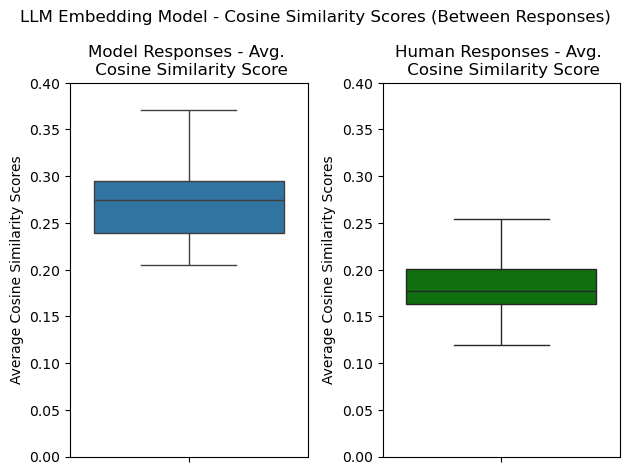

In [320]:
f, axes = plt.subplots(1, 2)
axes[0].set_ylim(0,.4)
axes[1].set_ylim(0,.4)
sns.boxplot(data=model_responses_df,y='mean_similarity', ax=axes[0])
sns.boxplot(data=human_response_df,y='mean_similarity',ax=axes[1], color='green')
axes[0].set_title('Model Responses - Avg. \n Cosine Similarity Score')
axes[1].set_title('Human Responses - Avg. \n Cosine Similarity Score')
axes[0].set_ylabel('Average Cosine Similarity Scores')
axes[1].set_ylabel('Average Cosine Similarity Scores')
f.suptitle('LLM Embedding Model - Cosine Similarity Scores (Between Responses)', ha='center')
f.tight_layout()
plt.show()

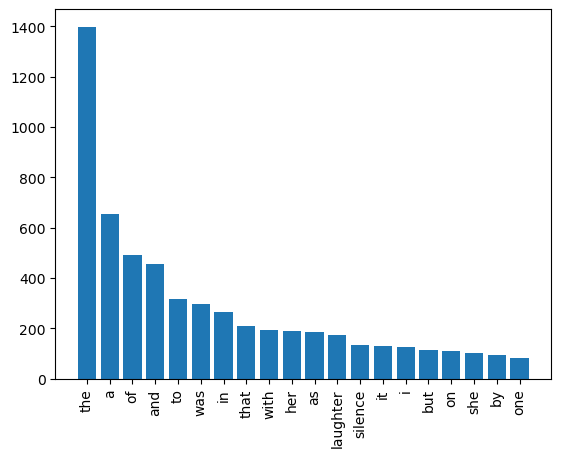

In [238]:
plt.bar(x=list(model_sorted_overall_dict_final.keys())[:20], height= list(model_sorted_overall_dict_final.values())[:20])
plt.xticks(rotation=90)
plt.show()

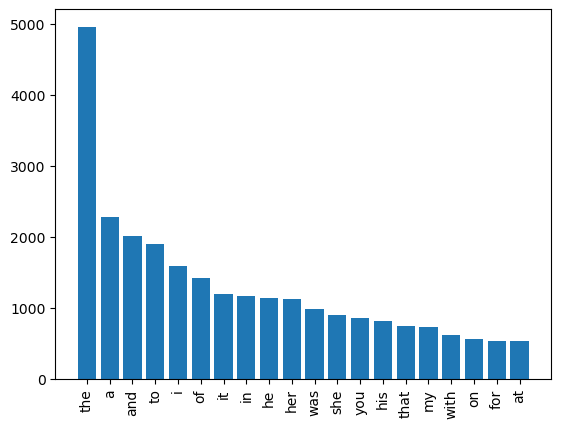

In [240]:
plt.bar(x=list(sorted_overall_dict_final_hum.keys())[:20], height= list(sorted_overall_dict_final_hum.values())[:20])
plt.xticks(rotation=90)
plt.show()

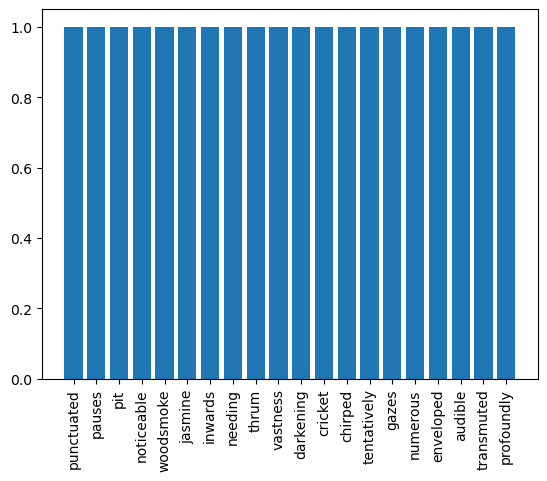

In [242]:
plt.bar(x=list(model_sorted_overall_dict_final.keys())[-20:], height= list(model_sorted_overall_dict_final.values())[-20:])
plt.xticks(rotation=90)
plt.show()

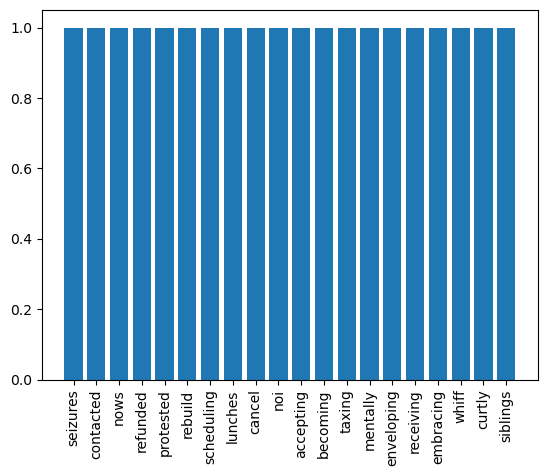

In [243]:
plt.bar(x=list(sorted_overall_dict_final_hum.keys())[-20:], height= list(sorted_overall_dict_final_hum.values())[-20:])
plt.xticks(rotation=90)
plt.show()

In [259]:
mod_word_df.tail()

,0,Percent of Words
numerous,1,99.975784
enveloped,1,99.981838
audible,1,99.987892
transmuted,1,99.993946
profoundly,1,100.000000


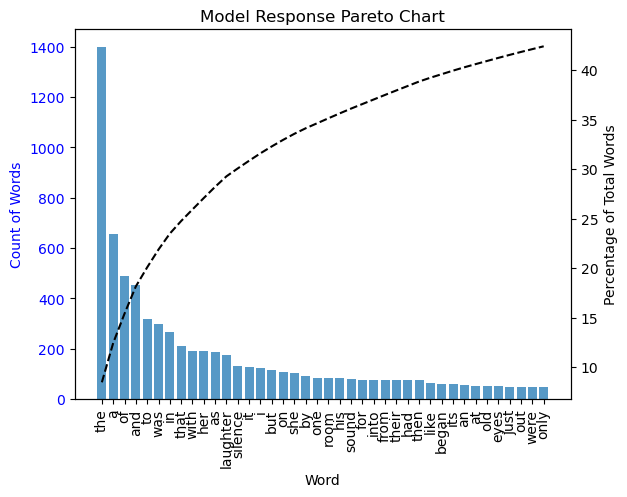

In [276]:
fig, ax1 = plt.subplots()
ax1.bar(x=mod_word_df.index[:40], height=mod_word_df[0][:40], alpha=.75)
ax1.set_ylabel('Count of Words', color='blue')
ax1.set_xlabel('Word')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()

ax2.plot(mod_word_df['Percent of Words'][:40], linestyle = '--', color='black')
ax2.set_ylabel('Percentage of Total Words', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax1.set_title('Model Response Pareto Chart')
plt.show()

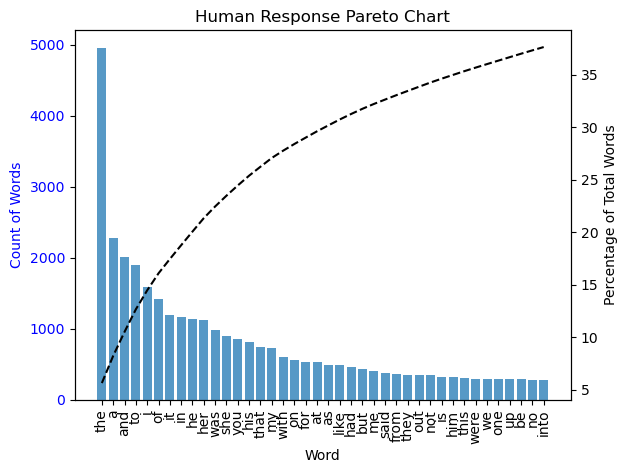

In [277]:
fig, ax1 = plt.subplots()
ax1.bar(x=hum_word_df.index[:40], height=hum_word_df[0][:40], alpha=.75)
ax1.set_ylabel('Count of Words', color='blue')
ax1.set_xlabel('Word')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()

ax2.plot(hum_word_df['Percent of Words'][:40], linestyle = '--', color='black')
ax2.set_ylabel('Percentage of Total Words', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax1.set_title('Human Response Pareto Chart')
plt.show()